In [2]:
# Data analysis project 

# Data Cleaning 

In [3]:
# Import the necessary library 

In [4]:
import numpy as np 
import pandas as pd 

In [5]:
df =pd.read_csv(r"C:\Users\KALPESH\Desktop\kalpesh projects\Data Analyst project\Dataset\ocd_patient_dataset.csv")
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,NaN,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,NaN


In [6]:
## inspect data 

In [13]:
df.shape

(1425, 19)

In [7]:
print("Missing values:",df.isna().sum())

Missing values: Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64


In [8]:
# Fill missing categorical/text values with "Not Reported"

In [9]:
# Method 1: Use .loc for explicit assignment
df.loc[:, 'Previous Diagnoses'] = df['Previous Diagnoses'].fillna("Not Reported")
df.loc[:, 'Medications'] = df['Medications'].fillna("Not Reported")


In [10]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


In [11]:
print("Data Types:",df.dtypes)

Data Types: Patient ID                        int64
Age                               int64
Gender                           object
Ethnicity                        object
Marital Status                   object
Education Level                  object
OCD Diagnosis Date               object
Duration of Symptoms (months)     int64
Previous Diagnoses               object
Family History of OCD            object
Obsession Type                   object
Compulsion Type                  object
Y-BOCS Score (Obsessions)         int64
Y-BOCS Score (Compulsions)        int64
Depression Diagnosis             object
Anxiety Diagnosis                object
Medications                      object
dtype: object


In [12]:
# Cell 6: Fill missing 'Obsession_Score' with median

In [13]:
median_score = df['Y-BOCS Score (Obsessions)'].median()
df.loc[:, 'Y-BOCS Score (Obsessions)'] = df['Y-BOCS Score (Obsessions)'].fillna(median_score)


In [14]:
# Cell 7: Drop rows with missing 'Treatment_Duration'

In [15]:
df.dropna(subset=['Duration of Symptoms (months)'], inplace=True)

In [16]:
# Drop duplicates

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
# Cell 9: Convert 'Gender' to 'Male'/'Female'

In [19]:
df['Gender'] = df['Gender'].replace({'M': 'Male', 'F': 'Female'})

In [20]:
# Cell 10: Convert dates to YYYY-MM-DD

In [21]:
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'])

In [ ]:
# Cell 11: Remove outliers in 'Age' using IQR
# This is for only single column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Age'] >= Q1 - 1.5*IQR) & (df['Age'] <= Q3 + 1.5*IQR)]


In [22]:
# We can do this for multiple columns 
from sklearn.ensemble import IsolationForest

# Step 1: Initialize the model (assumes 5% of data is anomalous)
model = IsolationForest(contamination=0.05, random_state=42)

# Step 2: Fit the model on Age and Obsession_Score
model.fit(df[['Age', 'Y-BOCS Score (Obsessions)']])

# Step 3: Predict outliers (-1 = outlier, 1 = inlier)
df['Outlier'] = model.predict(df[['Age', 'Y-BOCS Score (Obsessions)']])

# Step 4: Remove outliers
df = df[df['Outlier'] == 1]


In [23]:
# Cell 12: Final check
print("Cleaned Data Summary:\n", df.describe())



Cleaned Data Summary:
         Patient ID          Age             OCD Diagnosis Date  \
count  1425.000000  1425.000000                           1425   
mean   5555.368421    47.103860  2018-05-11 20:51:01.894736896   
min    1017.000000    18.000000            2013-11-13 00:00:00   
25%    3345.000000    33.000000            2016-03-16 00:00:00   
50%    5559.000000    48.000000            2018-05-13 00:00:00   
75%    7753.000000    61.000000            2020-06-24 00:00:00   
max    9995.000000    75.000000            2022-11-09 00:00:00   
std    2563.485795    16.146116                            NaN   

       Duration of Symptoms (months)  Y-BOCS Score (Obsessions)  \
count                    1425.000000                1425.000000   
mean                      121.904561                  20.141754   
min                         6.000000                   0.000000   
25%                        64.000000                  11.000000   
50%                       122.000000           

In [ ]:
# Cell 13: Save cleaned data

In [ ]:
df.to_csv('cleaned_ocd_data.csv', index=False)

# EDA(Exploratory Data Analysis)

In [24]:
#  Data Profiling

In [1]:
# Cell 1: Load cleaned data
import pandas as pd
df = pd.read_csv('cleaned_ocd_data.csv')



In [2]:
# Cell 2: Basic stats
print("Summary Stats:\n", df.describe())

Summary Stats:
         Patient ID          Age  Duration of Symptoms (months)  \
count  1425.000000  1425.000000                    1425.000000   
mean   5555.368421    47.103860                     121.904561   
std    2563.485795    16.146116                      67.575473   
min    1017.000000    18.000000                       6.000000   
25%    3345.000000    33.000000                      64.000000   
50%    5559.000000    48.000000                     122.000000   
75%    7753.000000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  Outlier  
count                1425.000000                 1425.000000   1425.0  
mean                   20.141754                   19.581754      1.0  
std                    11.510357                   11.773874      0.0  
min                     0.000000                    0.000000      1.0  
25%                    11.000

In [4]:
# Use the updated library
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="OCD Patient EDA")
profile.to_file("eda_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 18/18 [00:00<00:00, 113.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
# 2. Univariate Analysis

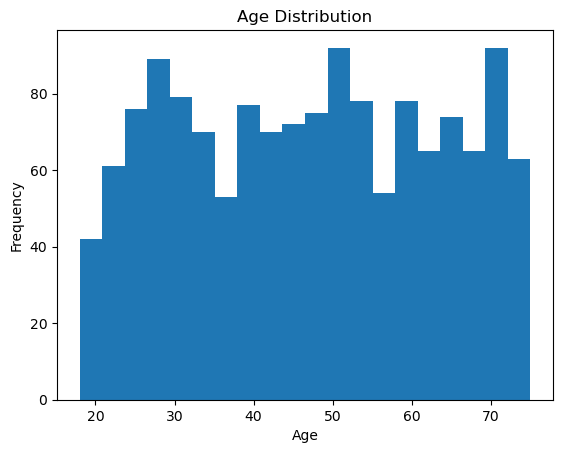

In [3]:
# Cell 4: Histogram for Age
import matplotlib.pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age Distribution')
plt.xlabel('Age')
plt.show()

###### Age Distribution: Are most patients adults (20–60)?
###### Y-BOCS Scores: How severe are obsessions/compulsions?

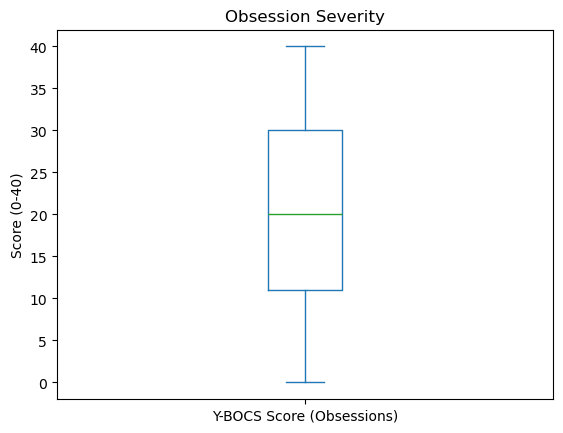

In [4]:
# Cell 5: Box plot for Y-BOCS Obsessions Score
df['Y-BOCS Score (Obsessions)'].plot(kind='box', title='Obsession Severity')
plt.ylabel('Score (0-40)')
plt.show()

In [5]:
#3. Bivariate Analysis
#Goal: Explore relationships between two variables.

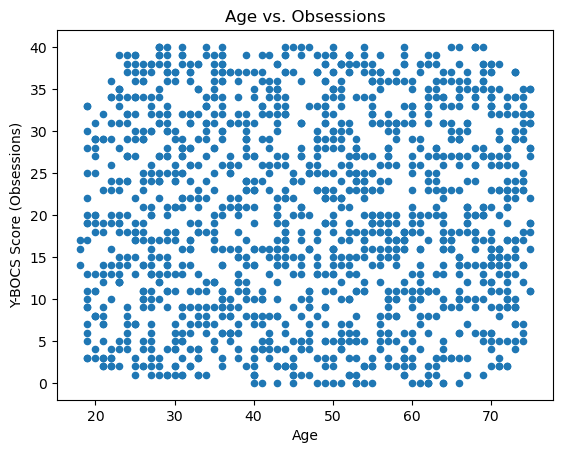

In [6]:
# Cell 6: Scatter plot (Age vs. Obsession Score)
df.plot(kind='scatter', x='Age', y='Y-BOCS Score (Obsessions)', title='Age vs. Obsessions')
plt.show()

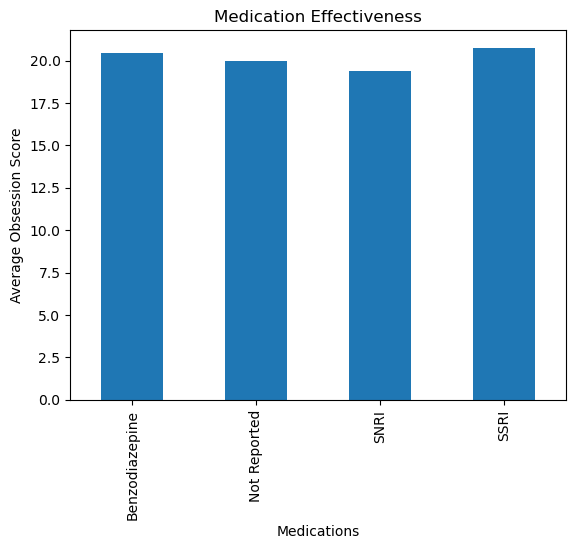

In [7]:
# Cell 7: Grouped bar chart (Medication vs. Average Score)
df.groupby('Medications')['Y-BOCS Score (Obsessions)'].mean().plot(kind='bar')
plt.title('Medication Effectiveness')
plt.ylabel('Average Obsession Score')
plt.show()

###### Age vs. Y-BOCS Score: Do older patients have higher symptom severity?
###### Medications vs. Symptom Improvement: Do SSRIs reduce scores?
###### Example Insights:
###### No strong correlation between age and obsession scores.
###### Patients on SSRIs show lower scores than those on Benzodiazepines.

In [8]:
#4. Multivariate Analysis
#Goal: Analyze interactions among 3+ variables.


In [9]:
#Example:
# Gender × Medication × Symptom Score: Which groups respond best?

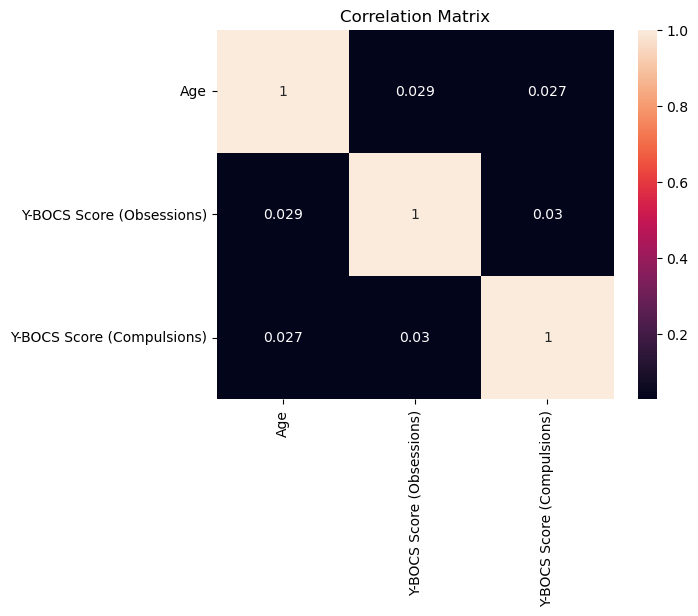

In [10]:
# Cell 8: Heatmap of correlations
import seaborn as sns
corr_matrix = df[['Age', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


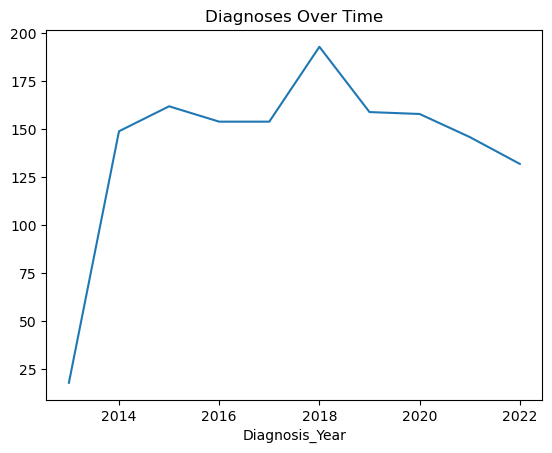

In [11]:
# Cell 9: Convert diagnosis date to datetime
df['OCD Diagnosis Date'] = pd.to_datetime(df['OCD Diagnosis Date'])
df['Diagnosis_Year'] = df['OCD Diagnosis Date'].dt.year

# Cell 10: Patients diagnosed per year
df['Diagnosis_Year'].value_counts().sort_index().plot(kind='line')
plt.title('Diagnoses Over Time')
plt.show()


In [12]:
# Cell 11: Feature engineering for clustering
from sklearn.preprocessing import StandardScaler
features = df[['Age', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# Feature Enginering

In [1]:
import pandas as pd  
from sklearn.preprocessing import StandardScaler  

In [3]:
df = pd.read_csv(r'C:\Users\KALPESH\Desktop\kalpesh projects\Data Analyst project\cleaned_ocd_data.csv')

In [6]:
#  Scale numerical features  
scaler = StandardScaler()  
df[['Age', 'Y-BOCS Score (Obsessions)']] = scaler.fit_transform(df[['Age', 'Y-BOCS Score (Obsessions)']]) 
print(df[['Age', 'Y-BOCS Score (Obsessions)']].head())  

        Age  Y-BOCS Score (Obsessions)
0 -0.935777                  -0.273046
1  1.356600                   0.074589
2  0.613127                  -1.489769
3 -1.245558                  -0.533772
4  0.551171                   1.638947


In [18]:
# Perform one-hot encoding WITHOUT dropping the first category
df_encoded = pd.get_dummies(df, columns=['Medications'])

# Check new columns
print(df_encoded.columns.tolist())


['Patient ID', 'Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level', 'OCD Diagnosis Date', 'Duration of Symptoms (months)', 'Previous Diagnoses', 'Family History of OCD', 'Obsession Type', 'Compulsion Type', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Depression Diagnosis', 'Anxiety Diagnosis', 'Outlier', 'Symptom_Duration_Per_Year', 'Cluster', 'Medications_Benzodiazepine', 'Medications_Not Reported', 'Medications_SNRI', 'Medications_SSRI']


In [7]:
#  One-hot encoding  
df_encoded = pd.get_dummies(df, columns=['Gender', 'Medications'], drop_first=True)  

# Check encoded columns  
print(df_encoded.head())  

   Patient ID       Age Ethnicity Marital Status Education Level  \
0        1018 -0.935777   African         Single    Some College   
1        2406  1.356600   African       Divorced    Some College   
2        1188  0.613127  Hispanic       Divorced  College Degree   
3        6200 -1.245558  Hispanic        Married  College Degree   
4        5824  0.551171  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180       Not Reported   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1                   Yes   Harm

In [8]:
#  Create new feature (Symptom Duration in Years)  
df['Symptom_Duration_Per_Year'] = df['Duration of Symptoms (months)'] / 12  

# Check new feature  
print(df[['Duration of Symptoms (months)', 'Symptom_Duration_Per_Year']].head())  

   Duration of Symptoms (months)  Symptom_Duration_Per_Year
0                            203                  16.916667
1                            180                  15.000000
2                            173                  14.416667
3                            126                  10.500000
4                            168                  14.000000


In [9]:
#  Drop irrelevant columns  
df_selected = df.drop(columns=['Patient ID', 'OCD Diagnosis Date'])  

# Check remaining columns  
print(df_selected.columns)  


Index(['Age', 'Gender', 'Ethnicity', 'Marital Status', 'Education Level',
       'Duration of Symptoms (months)', 'Previous Diagnoses',
       'Family History of OCD', 'Obsession Type', 'Compulsion Type',
       'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)',
       'Depression Diagnosis', 'Anxiety Diagnosis', 'Medications', 'Outlier',
       'Symptom_Duration_Per_Year'],
      dtype='object')


# MODEL BUILDING

In [ ]:
Step 1: Clustering Patients (Unsupervised Learning)
Goal: Group patients into clusters based on symptom severity and demographics.
Algorithm: K-Means (groups similar data points).

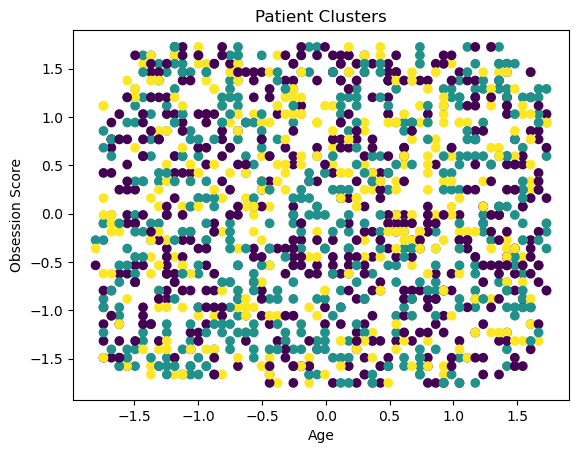

In [12]:
# Cell 1: Import libraries  
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt  

# Cell 2: Select features for clustering  
features = df[['Age', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]  

# Cell 3: Train K-Means model  
kmeans = KMeans(n_clusters=3, random_state=42)  
df['Cluster'] = kmeans.fit_predict(features)  

# Cell 4: Visualize clusters  
plt.scatter(features.iloc[:, 0], features.iloc[:, 1], c=df['Cluster'], cmap='viridis')  
plt.xlabel('Age')  
plt.ylabel('Obsession Score')  
plt.title('Patient Clusters')  
plt.show()  


In [ ]:
Output:
Cluster 0: Younger patients with mild symptoms.

Cluster 1: Middle-aged patients with moderate symptoms.

Cluster 2: Older patients with severe symptoms.

In [ ]:
Step 2: Classification (Supervised Learning)
Goal: Predict whether a patient will benefit from SSRIs based on their features.
Algorithm: Logistic Regression (binary classification).

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Features (X): Use Age and Y-BOCS scores
X = df_encoded[['Age', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']]

# Target (y): Use the new column Medications_SSRI
y = df_encoded['Medications_SSRI']  # This column now exists!

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate accuracy
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.84
